In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visualization_utils
import math
import seaborn as sns
import numpy as np

In [40]:
def get_data_to_barplot_slow_fast(pruning_percentage, mbps):
    fpath = f'../data/network/{mbps}/'
    SHOW_WEIGHTED = True # show weighted accuracy instead of unweighted accuracy
    PLOT_CLIENTS = True

    testbed_10k_5mbps = fpath + 'metrics_stat_testbed.csv' # change to None if desired
    testbed_10k_5mbps_pruned = fpath + 'metrics_stat_testbed_pruned.csv' # change to None if desired
    
    
    metrics_testbed_5mps = visualization_utils.load_data(testbed_10k_5mbps)
    metrics_testbed_5mps_pruned = visualization_utils.load_data(testbed_10k_5mbps_pruned)

    df_slow_device_5mpbs = metrics_testbed_5mps.loc[metrics_testbed_5mps['is_slow'] == 1]
    df_slow_device_5mpbs['prune_percentage'] = 'Slow Device (Large)'
    df_slow_device_5mpbs['device_type'] = "Slow Device"
    df_slow_device_5mpbs['speed'] = f'{mbps} Mbps'
    
    df_fast_device_5mpbs = metrics_testbed_5mps.loc[metrics_testbed_5mps['is_slow'] == 0]
    df_fast_device_5mpbs['device_type'] = "Fast Device"
    df_fast_device_5mpbs['prune_percentage'] = 'Fast Device (Large)'
    df_fast_device_5mpbs['speed'] = f'{mbps} Mbps'
    
    
    df_slow_device_5mpbs_pruned = metrics_testbed_5mps_pruned.loc[metrics_testbed_5mps_pruned['is_slow'] == 1]
    df_slow_device_5mpbs_pruned['prune_percentage'] = f'{pruning_percentage}% Pruned'
    df_slow_device_5mpbs_pruned['device_type'] = "Slow Device"
    df_slow_device_5mpbs_pruned['speed'] = f'{mbps} Mbps'
    
   
    panda_frames = []
    
    panda_frames.append(df_slow_device_5mpbs_pruned)
    combined_pruned_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    panda_frames = []

#     panda_frames.append(df_fast_device_80mpbs)
#     panda_frames.append(df_slow_device_80mpbs)
    panda_frames.append(df_fast_device_5mpbs)
    panda_frames.append(df_slow_device_5mpbs)
    

    combined_frame = pd.concat(panda_frames, axis=0, ignore_index=True)
    
    return combined_pruned_frame, combined_frame#data_to_plot, data_to_plot_pruned

In [52]:
combined_pruned_frame_1, combined_frame_1 = get_data_to_barplot_slow_fast(50, 1)
combined_pruned_frame_5, combined_frame_5 = get_data_to_barplot_slow_fast(50, 5)
# combined_pruned_frame_50, combined_frame_50 = get_data_to_barplot_slow_fast(50, '14-10-2021')
# combined_pruned_frame_70, combined_frames_70 = get_data_to_barplot_slow_fast(70, '14-10-2021')

panda_frames_sf = []


panda_frames_sf.append(combined_frame_1)
panda_frames_sf.append(combined_pruned_frame_1)
panda_frames_sf.append(combined_frame_5)
panda_frames_sf.append(combined_pruned_frame_5)


combined_frame_sf = pd.concat(panda_frames_sf, axis=0, ignore_index=True)

/home/aliza16/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/aliza16/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/aliza16/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [48]:
combined_frame_sf[['is_slow', 'model_download_time', 'model_report_time', 'prune_percentage']]

,is_slow,model_download_time,model_report_time,prune_percentage
0,0,3.051,6.050,Fast Device (Large)
1,0,2.892,6.400,Fast Device (Large)
2,1,5.607,8.370,Slow Device (Large)
3,1,5.384,8.800,Slow Device (Large)
4,1,5.607,6.800,50% Pruned
...,...,...,...,...
57,1,2.942,6.380,50% Pruned
58,1,3.176,6.029,50% Pruned
59,1,2.529,6.066,50% Pruned
60,1,2.931,6.190,50% Pruned


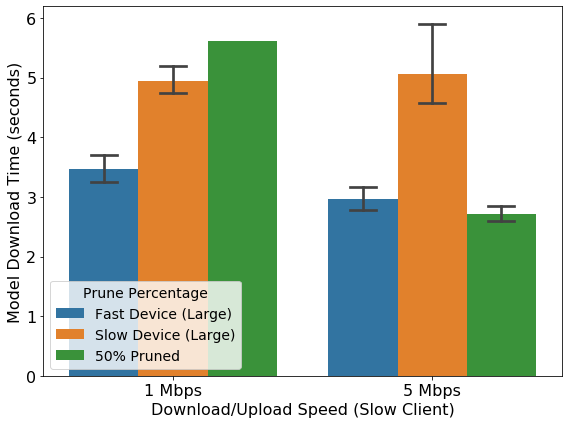

In [53]:
font_size = 16
#     sns.set_style({'font.family': font_family})
def plot_by_speed(dtype):
    fig, ax = plt.subplots(figsize=(8,6))


    # bar_plot = sns.barplot(x="prune_percentage",y="total_train_time",data=combined_frame_sf, hue="prune_percentage",capsize=0.1)
    bar_plot = sns.barplot(x="speed",y=dtype,data=combined_frame_sf, hue="prune_percentage",capsize=0.1)
    bar_plot.set_ylabel('Training Time in Milliseconds')
    bar_plot.set_xlabel('Model Parameters')          

    bar_plot.legend(title="Prune Percentage", fontsize=14, title_fontsize = 14, loc="best")

    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
#     plt.yscale('log')
    
    label = "Model Download"
    if dtype == "model_report_time":
        label = "Model Upload"
    
    ax.set_ylabel(f'{label} Time (seconds)', fontsize=font_size)
    ax.set_xlabel('Download/Upload Speed (Slow Client)', fontsize=font_size)

#     ax.set_ylim(0, 36)
    plt.tight_layout()

#     for index, p in enumerate(bar_plot.patches):
#         current_width = p.get_width()
#         current_pos = p.get_x()
#     #     print(type(p))

#     #     if index == 0:
#     #     p.set_x(current_pos+(current_width*2))
#     #     bar_plot.axes.lines[index].set_xdata(current_pos+(current_width*2.5))
#     #     print(bar_plot.axes.lines[index+1].get_xdata()) #[-0.37 -0.27]
#     #     bar_plot.axes.lines[index+1].set_xdata([0.05, -0.05])
#     #     bar_plot.axes.lines[2].set_xdata([0.05, -0.05])
#         if dtype == 'model_download_time':
#             if index == 0:
#                 bar_plot.annotate("{0:.1f}".format(p.get_height()),
#                            (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.215), 
#                            ha = 'center', va = 'center', 
#                            xytext = (1, 9), 
#                            textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
#             else:

#                 bar_plot.annotate("{0:.1f}".format(p.get_height()),
#                            (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.11), 
#                            ha = 'center', va = 'center', 
#                            xytext = (1, 9), 
#                            textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
#         else:
#             if index == 0:
#                 bar_plot.annotate("{0:.1f}".format(p.get_height()),
#                        (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.04), 
#                        ha = 'center', va = 'center', 
#                        xytext = (1, 9), 
#                        textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
#             else:

#                 bar_plot.annotate("{0:.1f}".format(p.get_height()),
#                            (p.get_x() + p.get_width() / 2., p.get_height() + p.get_height()*0.011), 
#                            ha = 'center', va = 'center', 
#                            xytext = (1, 9), 
#                            textcoords = 'offset points', color=p.get_facecolor(),weight='bold', size='large')    
    

    plt.savefig(f'bar_plot_slow_fast_by_{dtype}.png')

plot_by_speed('model_download_time')

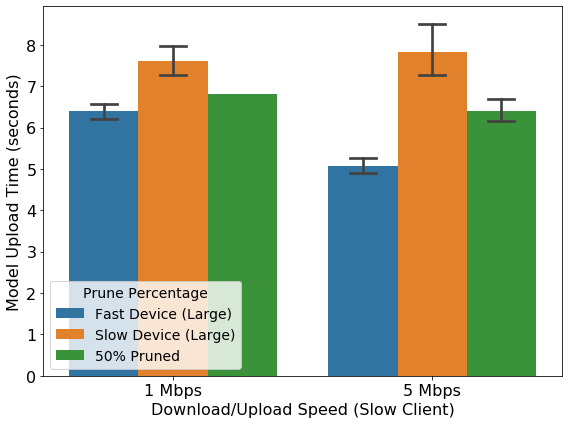

In [54]:
plot_by_speed('model_report_time')

In [ ]:
df = pd.DataFrame({'business_postal_code': ,
 'Model Download Time': ,
 'Model Report Time': )
df.pivot(*df).plot(kind = 'bar', stacked = True)